In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('boston_house_prices.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## If data is missing
### Get rid of missing data points 
df.dropna(subset=["RM"])
df.drop("RM", axis=1)
### Fill it with values(0, mean, median)
median = df['RM'].median()
df["RM"].fillna(median)

In [5]:
### from sklearn.preprocessing import Imputer
## imputer = Imputer(strategy = "median")
# X = imputer.transform(df) ## Applies imputer to all the attributes of data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

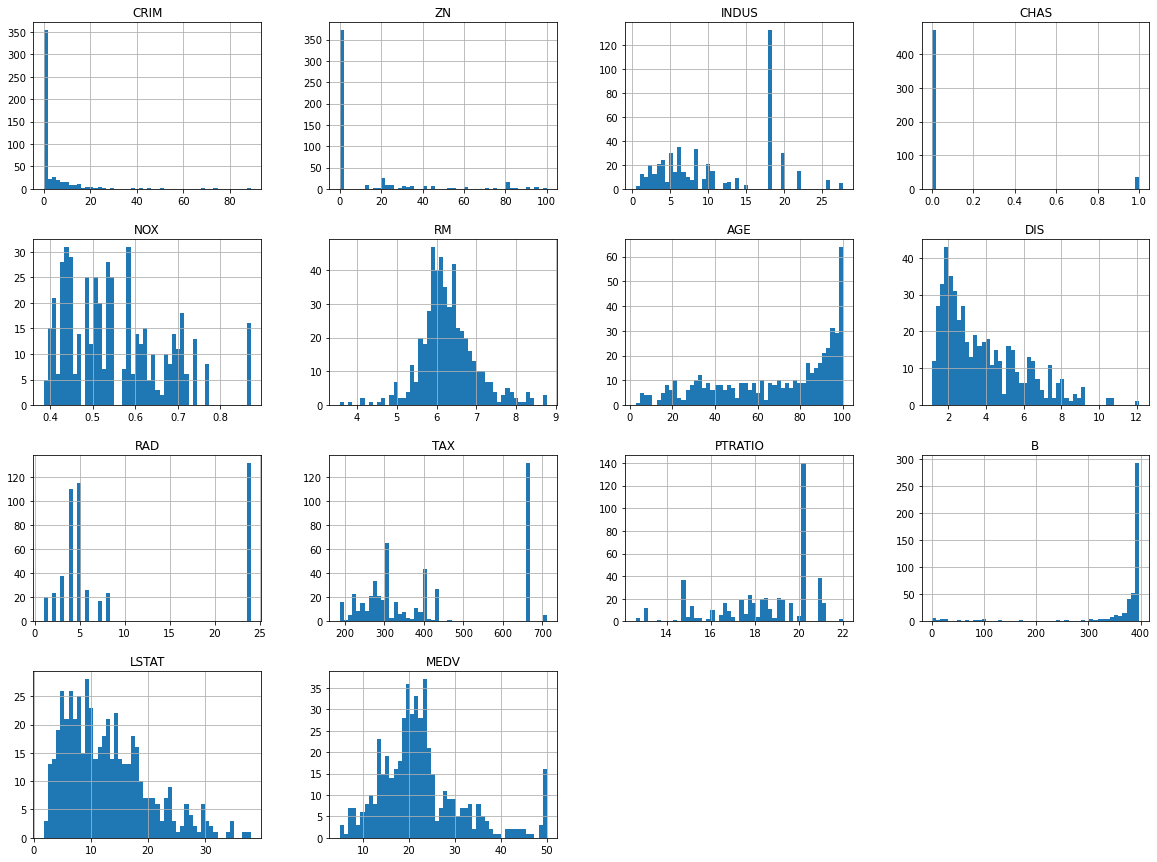

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show

# Train - Test Splitting

In [8]:
#from sklearn.model_selection import train_test_split
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#Strat splits data according to the value of 'CHAS' into test and train sets equally
for train_index, test_index in split.split(df, df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [10]:
#Setting the training set data as base data
df = strat_train_set.copy() 

In [11]:
corr_matrix = df.corr()

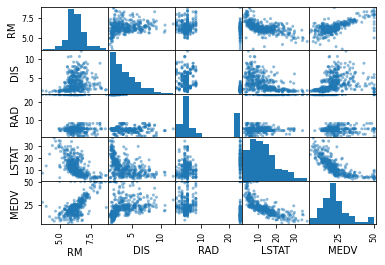

In [12]:
from pandas.plotting import scatter_matrix
attributes = ['RM','DIS','RAD','LSTAT','MEDV']
scatter_matrix(df[attributes])
plt.show()

In [13]:
df = strat_train_set.drop('MEDV', axis=1)
df_labels = strat_train_set['MEDV'].copy()

## Pipeline

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline= Pipeline([
    ('std_scaler', StandardScaler()),
])

In [15]:
df_tr = my_pipeline.fit_transform(df)
df_tr.shape

(404, 13)

# Model

In [16]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(df_tr, df_labels)

RandomForestRegressor()

In [17]:
prepared_data = my_pipeline.transform(df.iloc[:5])

In [18]:
model.predict(prepared_data)

array([22.437, 25.428, 16.467, 23.314, 23.502])

In [19]:
list(df_labels.iloc[:5])

[21.9, 24.5, 16.7, 23.1, 23.0]

In [20]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_tr)
mse = mean_squared_error(df_labels, df_predictions)
rmse = np.sqrt(mse)

In [21]:
rmse

1.231252807203916

Random Forest provides the least Root mean squared error, so a viable model

## Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_tr, df_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [23]:
rmse_scores

array([2.80998235, 2.83745445, 4.52819667, 2.65159449, 3.35511949,
       2.58846694, 4.84713031, 3.29960942, 3.44775015, 3.34021838])

In [24]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [25]:
print_scores(rmse_scores)

Scores: [2.80998235 2.83745445 4.52819667 2.65159449 3.35511949 2.58846694
 4.84713031 3.29960942 3.44775015 3.34021838]
Mean:  3.370552263853438
Standard deviation:  0.7252284910663757


# Saving Model

In [26]:
from joblib import dump, load
dump(model, 'Housing Prediction.joblib') 

['Housing Prediction.joblib']

## Testing Model

In [27]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()

X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [28]:
final_rmse

2.9463607861823253

# Using Model

In [29]:
from joblib import dump, load
import numpy as np
model = load('Housing Prediction.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747, 
                      3.44443979304, 9.31238772,  7.61111401, -26.0016879 , -0.5778192 , 
                      -0.97491834,  0.41164221, 48.86091034]])
model.predict(features)

array([30.55])

Predicted Output for the provided input